# INTEGRANTES


*   Luis Ernesto Rodriguez Felacio
*   Andrés David Ariza Granados



In [20]:
# IMPORT librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode

In [21]:
#Obtener Datos

df = pd.read_csv("./Recuperaci_n_Veh_culos_Polic_a_Nacional.csv")

In [22]:
# Previsualizar datos
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,CLASE BIEN,FECHA HECHO,CANTIDAD
0,ATLÁNTICO,MALAMBO,8433000,MOTOCICLETA,1/01/2010,1
1,BOYACÁ,TUNJA (CT),15001000,MOTOCICLETA,1/01/2010,1
2,CALDAS,MANIZALES (CT),17001000,MOTOCICLETA,1/01/2010,1
3,CESAR,VALLEDUPAR (CT),20001000,MOTOCICLETA,1/01/2010,2
4,CÓRDOBA,LORICA,23417000,MOTOCICLETA,1/01/2010,1


In [23]:
# Dimensiones del dataframe

df.shape

(162709, 6)

In [24]:
# Columnas del dataframe

df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'CLASE BIEN', 'FECHA HECHO',
       'CANTIDAD'],
      dtype='object')

In [25]:
# Tipos de datos de las columnas del dataframe

df.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE      int64
CLASE BIEN      object
FECHA HECHO     object
CANTIDAD         int64
dtype: object

In [26]:
# Cantidad de registros del dataset

print("Dataset length", len(df))

Dataset length 162709


In [27]:
#renombrar columnas del dataset

name = ['DEPARTAMENTO','MUNICIPIO', 'CIUDAD_DANE', 'TIPO_VEHICULO','FECHA_RECUPERACION','CANTIDAD']
df.columns = name
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CIUDAD_DANE', 'TIPO_VEHICULO',
       'FECHA_RECUPERACION', 'CANTIDAD'],
      dtype='object')

In [28]:
# Mostrar los valores únicos en cada columna
for columna in df.columns:
    valores_unicos = df[columna].value_counts()
    print(f"Valores en la columna {columna}:\n{valores_unicos}\n")

Valores en la columna DEPARTAMENTO:
DEPARTAMENTO
ANTIOQUIA             24201
CUNDINAMARCA          18432
VALLE                 16766
CAUCA                 13331
NARIÑO                10035
ATLÁNTICO              8264
NORTE DE SANTANDER     6371
HUILA                  5640
SANTANDER              5559
META                   5415
CESAR                  5031
TOLIMA                 4374
GUAJIRA                4326
CÓRDOBA                4242
BOLÍVAR                4190
MAGDALENA              3996
RISARALDA              3692
BOYACÁ                 2354
SUCRE                  2300
PUTUMAYO               2017
CASANARE               1945
CALDAS                 1873
CAQUETÁ                1758
CHOCÓ                  1712
QUINDÍO                1673
ARAUCA                 1357
AMAZONAS                723
GUAVIARE                445
SAN ANDRÉS              320
VICHADA                 277
GUAINÍA                  59
VAUPÉS                   31
Name: count, dtype: int64

Valores en la columna MUNICI

In [29]:
# Tipos de datos del Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162709 entries, 0 to 162708
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   DEPARTAMENTO        162709 non-null  object
 1   MUNICIPIO           162709 non-null  object
 2   CIUDAD_DANE         162709 non-null  int64 
 3   TIPO_VEHICULO       162709 non-null  object
 4   FECHA_RECUPERACION  162709 non-null  object
 5   CANTIDAD            162709 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.4+ MB


In [30]:
# Comprobamos que no todos los codigos de la variable CIUDAD_DANE cuando es Bogotá tienen la misma etiqueta, algunos estan en minuscula

df[(df.MUNICIPIO != "BOGOTÁ D.C. (CT)") & (df.CIUDAD_DANE == 11001000)]

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
152589,CUNDINAMARCA,Bogotá D.C. (CT),11001000,CUATRIMOTO,12/01/2023,1
152590,CUNDINAMARCA,Bogotá D.C. (CT),11001000,CUATRIMOTO,06/02/2023,1
152610,CUNDINAMARCA,Bogotá D.C. (CT),11001000,MOTO-CARRO,06/02/2023,1
156168,CUNDINAMARCA,Bogotá D.C. (CT),11001000,MOTOCICLETA,01/01/2023,12
156169,CUNDINAMARCA,Bogotá D.C. (CT),11001000,MOTOCICLETA,02/01/2023,5
...,...,...,...,...,...,...
162633,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,7/05/2023,1
162634,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,9/05/2023,1
162635,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,27/05/2023,1
162636,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,11/06/2023,1


In [31]:
#Realizamos el metodo para que todos los municipios queden en mayuscula

df['MUNICIPIO'] = df['MUNICIPIO'].str.upper()

In [32]:
# Comrprobamos el cambio realizado

df[df.CIUDAD_DANE == 11001000]

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
18,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CAMIONETA,1/01/2010,1
25,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,MOTOCICLETA,2/01/2010,1
72,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,MOTOCICLETA,4/01/2010,3
114,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,AUTOMOVIL,5/01/2010,4
122,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CAMIONETA,5/01/2010,2
...,...,...,...,...,...,...
162633,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,7/05/2023,1
162634,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,9/05/2023,1
162635,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,27/05/2023,1
162636,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,11/06/2023,1


In [33]:
# Encontramos que algunos datos de CIUDAD_DANE para Medellin no vienen con el mismo codigo.

df[(df.MUNICIPIO == "MEDELLÍN (CT)") & (df.CIUDAD_DANE != 5001000)]

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
153301,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,24/02/2023,1
153310,ANTIOQUIA,MEDELLÍN (CT),5001001,MOTOCICLETA,04/03/2023,1
153371,ANTIOQUIA,MEDELLÍN (CT),5001001,MOTOCICLETA,04/05/2023,1
153373,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,05/05/2023,1
153376,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,07/05/2023,1
153411,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,10/06/2023,1
161604,ANTIOQUIA,MEDELLÍN (CT),5001004,CAMION,7/07/2023,1
161794,ANTIOQUIA,MEDELLÍN (CT),5001004,CAMIONETA,21/04/2023,1
162686,ANTIOQUIA,MEDELLÍN (CT),5001008,VOLQUETA,14/02/2023,1


In [34]:
# Con esta funcion aplicamos una consulta para saber cuantos registros no tienen "000" en sus ultimos 3 digitos en la variable CIUDAD_DANE

def tiene_tres_ceros_al_reves(numero):
    if len(str(numero)) == 7:
        flag = str(numero)[:3:-1] != '000'
    else:
        flag = str(numero)[:4:-1] != '000'
    return flag

# Filtrar filas donde 'CIUDAD_DANE' invertida no sea igual a '000'
df_filtrado = df[df['CIUDAD_DANE'].apply(tiene_tres_ceros_al_reves)]
df_filtrado

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
152628,AMAZONAS,LETICIA (CT),91001008,MOTOCICLETA,05/02/2023,1
152680,ANTIOQUIA,AMAGÁ,5030011,MOTOCICLETA,24/05/2023,1
152683,ANTIOQUIA,AMAGÁ,5030011,MOTOCICLETA,20/06/2023,1
152686,ANTIOQUIA,AMAGÁ,5030011,MOTOCICLETA,20/07/2023,1
152810,ANTIOQUIA,BELLO,5088003,MOTOCICLETA,26/06/2023,1
...,...,...,...,...,...,...
162549,CAUCA,ROSAS,19622012,TRACTO_CAMION,29/07/2023,1
162584,TOLIMA,ESPINAL,73268001,TRACTOR,24/02/2023,1
162603,ANTIOQUIA,REMEDIOS,5604001,VEHICULO-PANEL,7/06/2023,1
162664,MAGDALENA,PUEBLOVIEJO,47570004,VEHICULO-PANEL,28/07/2023,1


In [35]:
# Transofrmamos los valores de CIUDAD_DANE quitando los ultimos 3 digitos y con esto se soluciona el problema de que los municipios no correspondian a sus respectivos codigos de CIUDAD_DANE

df['CIUDAD_DANE'] = df['CIUDAD_DANE'].astype(str).str.slice(stop=-3).astype(int)

In [52]:
# Comprobamos el ajuste anterior

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD,DepartamentoAgrupado,VEHICULO_AGRUPADO
0,ATLANTICO,MALAMBO,8433,MOTOCICLETA,2010-01-01,1,ATLANTICO,MOTOCICLETA
1,BOYACA,TUNJA (CT),15001,MOTOCICLETA,2010-01-01,1,Otros,MOTOCICLETA
2,CALDAS,MANIZALES (CT),17001,MOTOCICLETA,2010-01-01,1,Otros,MOTOCICLETA
3,CESAR,VALLEDUPAR (CT),20001,MOTOCICLETA,2010-01-01,2,CESAR,MOTOCICLETA
4,CORDOBA,LORICA,23417,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
5,CORDOBA,LOS CORDOBAS,23419,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
6,CORDOBA,MONTERIA (CT),23001,MOTOCICLETA,2010-01-01,2,CORDOBA,MOTOCICLETA
7,CORDOBA,SAHAGUN,23660,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
8,NARINO,IPIALES,52356,MOTOCICLETA,2010-01-01,1,NARINO,MOTOCICLETA
9,NORTE DE SANTANDER,OCANA,54498,MOTOCICLETA,2010-01-01,1,NORTE DE SANTANDER,MOTOCICLETA


In [53]:
# Transformamos la fecha de recuperación del vehiculo de formato String a Datetime

df['FECHA_RECUPERACION'] = pd.to_datetime(df['FECHA_RECUPERACION'], format="%d/%m/%Y")

In [50]:
# Comprobamos el ajuste anterior

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD,DepartamentoAgrupado,VEHICULO_AGRUPADO
0,ATLANTICO,MALAMBO,8433,MOTOCICLETA,2010-01-01,1,ATLANTICO,MOTOCICLETA
1,BOYACA,TUNJA (CT),15001,MOTOCICLETA,2010-01-01,1,Otros,MOTOCICLETA
2,CALDAS,MANIZALES (CT),17001,MOTOCICLETA,2010-01-01,1,Otros,MOTOCICLETA
3,CESAR,VALLEDUPAR (CT),20001,MOTOCICLETA,2010-01-01,2,CESAR,MOTOCICLETA
4,CORDOBA,LORICA,23417,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
5,CORDOBA,LOS CORDOBAS,23419,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
6,CORDOBA,MONTERIA (CT),23001,MOTOCICLETA,2010-01-01,2,CORDOBA,MOTOCICLETA
7,CORDOBA,SAHAGUN,23660,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
8,NARINO,IPIALES,52356,MOTOCICLETA,2010-01-01,1,NARINO,MOTOCICLETA
9,NORTE DE SANTANDER,OCANA,54498,MOTOCICLETA,2010-01-01,1,NORTE DE SANTANDER,MOTOCICLETA


In [39]:
# Comprobamos el ajuste del nuevo tipo de dato para la FECHA_RECUPERACION

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162709 entries, 0 to 162708
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DEPARTAMENTO        162709 non-null  object        
 1   MUNICIPIO           162709 non-null  object        
 2   CIUDAD_DANE         162709 non-null  int64         
 3   TIPO_VEHICULO       162709 non-null  object        
 4   FECHA_RECUPERACION  162709 non-null  datetime64[ns]
 5   CANTIDAD            162709 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.4+ MB


In [40]:
# Eliminamos las tildes que pueden causar errores de compatibilidad al graficarse o filtrarse la información

df['DEPARTAMENTO'] = df['DEPARTAMENTO'].apply(lambda x: unidecode(x))
df['MUNICIPIO'] = df['MUNICIPIO'].apply(lambda x: unidecode(x))

In [51]:
# Comprobación del ajuste anterior.

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD,DepartamentoAgrupado,VEHICULO_AGRUPADO
0,ATLANTICO,MALAMBO,8433,MOTOCICLETA,2010-01-01,1,ATLANTICO,MOTOCICLETA
1,BOYACA,TUNJA (CT),15001,MOTOCICLETA,2010-01-01,1,Otros,MOTOCICLETA
2,CALDAS,MANIZALES (CT),17001,MOTOCICLETA,2010-01-01,1,Otros,MOTOCICLETA
3,CESAR,VALLEDUPAR (CT),20001,MOTOCICLETA,2010-01-01,2,CESAR,MOTOCICLETA
4,CORDOBA,LORICA,23417,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
5,CORDOBA,LOS CORDOBAS,23419,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
6,CORDOBA,MONTERIA (CT),23001,MOTOCICLETA,2010-01-01,2,CORDOBA,MOTOCICLETA
7,CORDOBA,SAHAGUN,23660,MOTOCICLETA,2010-01-01,1,CORDOBA,MOTOCICLETA
8,NARINO,IPIALES,52356,MOTOCICLETA,2010-01-01,1,NARINO,MOTOCICLETA
9,NORTE DE SANTANDER,OCANA,54498,MOTOCICLETA,2010-01-01,1,NORTE DE SANTANDER,MOTOCICLETA


In [42]:
# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['DEPARTAMENTO'].value_counts()

# Agrupar departamentos menos frecuentes bajo la categoría 'Otros'
df['DepartamentoAgrupado'] = df['DEPARTAMENTO'].map(lambda x: x if frecuencia_departamentos[x] >= len(df) * 0.025 else 'Otros')

In [43]:
table_departamentos = df.DepartamentoAgrupado.value_counts(normalize=True) * 100
table_departamentos

DepartamentoAgrupado
Otros                 16.306412
ANTIOQUIA             14.873793
CUNDINAMARCA          11.328199
VALLE                 10.304286
CAUCA                  8.193155
NARINO                 6.167452
ATLANTICO              5.079006
NORTE DE SANTANDER     3.915579
HUILA                  3.466311
SANTANDER              3.416529
META                   3.328027
CESAR                  3.092023
TOLIMA                 2.688235
GUAJIRA                2.658734
CORDOBA                2.607108
BOLIVAR                2.575150
Name: proportion, dtype: float64

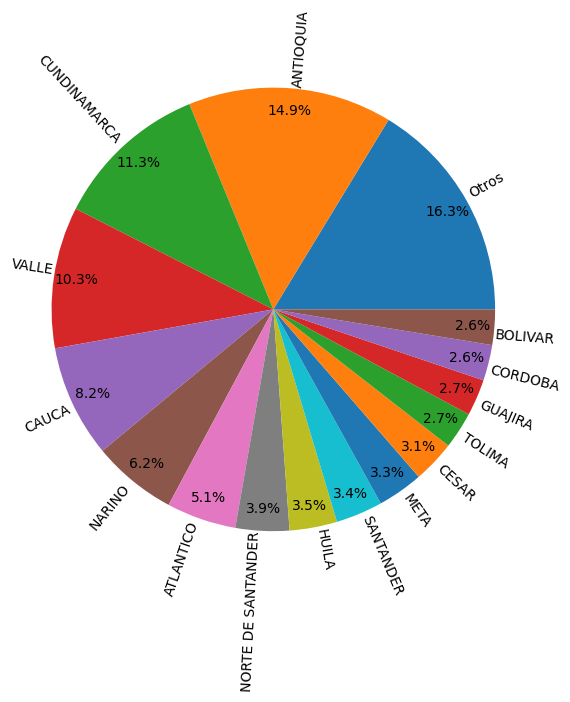

In [44]:
# Gráfico de sectores

plt.pie(table_departamentos,labels = table_departamentos.index,autopct = '%1.1f%%', labeldistance=1, pctdistance=0.9, rotatelabels=True, radius=1.5)
plt.show()

In [45]:
# Calcular la frecuencia de cada tipo de vehiculo
frecuencia_vehiculo = df['TIPO_VEHICULO'].value_counts()

# Agrupar vehiculos menos frecuentes bajo la categoría 'Otros'
df['VEHICULO_AGRUPADO'] = df['TIPO_VEHICULO'].map(lambda x: x if frecuencia_vehiculo[x] >= len(df) * 0.003 else 'Otros')

In [46]:
table_tipo_vehiculo = df.VEHICULO_AGRUPADO.value_counts(normalize=True, ) * 100
table_tipo_vehiculo

VEHICULO_AGRUPADO
MOTOCICLETA       67.422822
AUTOMOVIL         14.712155
CAMIONETA          8.010006
CAMION             3.597834
CAMPERO            1.664936
Otros              1.408035
TAXI               1.015310
TRACTO_CAMION      0.878870
VEHICULO-PANEL     0.805118
VOLQUETA           0.484915
Name: proportion, dtype: float64

In [47]:
df_tipo_vehiculo = pd.DataFrame({'Vehiculo': table_tipo_vehiculo.index,
                                 'Valores':table_tipo_vehiculo.values})

/tmp/ipykernel_25091/159489134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo,x='Vehiculo',y = 'Valores', palette= 'Set2')


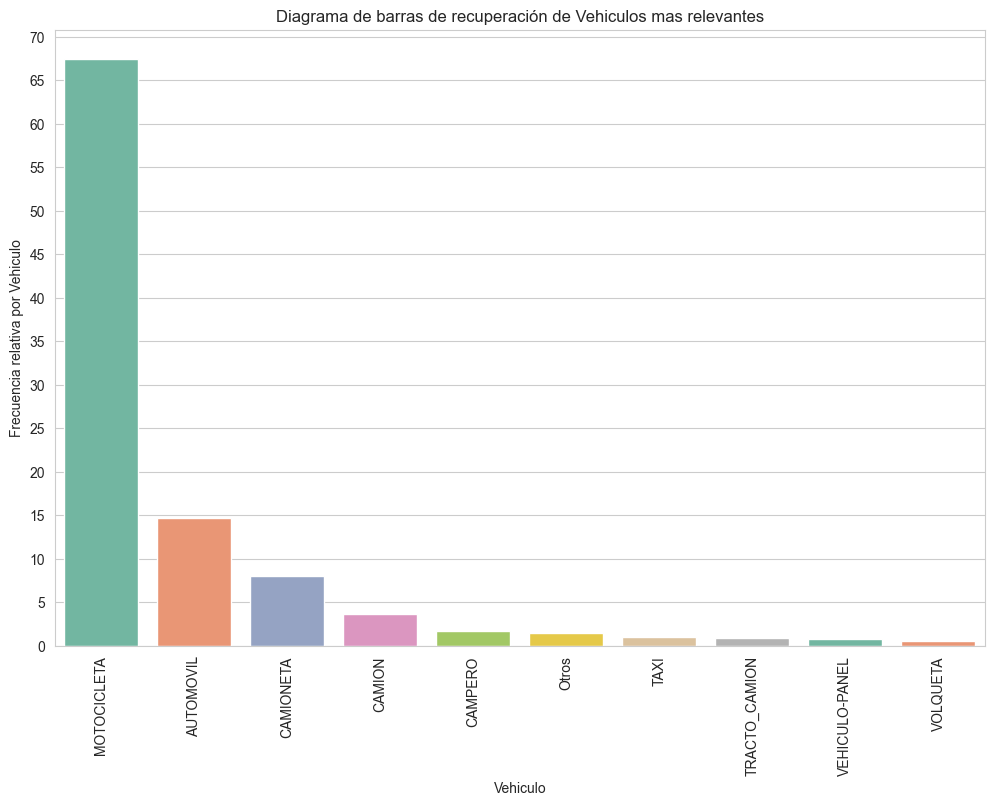

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()